## Name : Yash Deshpande
## Registration Number : 201060013

# Unsharp Masking & High Boost Filtering Using Mean Blur

## Importing Libraries 

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

## Calculating the 3 x 3 Mean Blur from scratch

In [50]:
start = time.time()

image = np.array([[1,2,3],[4,5,6],[7,8,9]])
output = np.zeros((3,3))
print('Original Image')
print(image)

# Initialize the rows 
row_start = 0
row_end = 2

for i in range(0,3):
    
    # initialize the columns
    col_start = 0
    col_end = 2
    
    # find row start-end 
    if(i % 2 != 0):
        row_end += 1
    elif(i % 2 == 0 and i != 0):
        row_start += 1

    # find column start-end    
    for j in range(0,3): 
        if(j % 2 != 0):
            col_end += 1
        elif(j % 2 == 0 and j != 0):
            col_start += 1
            
        # calculating value of output
        for m in range(row_start, row_end):
            for n in range(col_start, col_end):
                output[i][j] += image[m][n]


# normalizing the values of output
output //= (9)

print('\n Blurred Image')
print(output)

print('\n Mask')
mask = image-output
print(mask)

print('\n Unsharp Masking')
final = image+mask 
print(final)

end = time.time()
print(end-start)
        
# plt.imshow(a, cmap= 'gray')
# plt.show()
# plt.imshow(b, cmap= 'gray')
# plt.show()
# plt.imshow(c, cmap = 'gray')
# plt.show()
# plt.imshow(d, cmap = 'gray')
# # for i in range(0,3):
# #     for j in  range(0,3):
# #         print()
        

Original Image
[[1 2 3]
 [4 5 6]
 [7 8 9]]

 Blurred Image
[[1. 2. 1.]
 [3. 5. 3.]
 [2. 4. 3.]]

 Mask
[[0. 0. 2.]
 [1. 0. 3.]
 [5. 4. 6.]]

 Unsharp Masking
[[ 1.  2.  5.]
 [ 5.  5.  9.]
 [12. 12. 15.]]
0.0081634521484375


## Applying the from-scratch Mean Blur Algorithm to any Image 

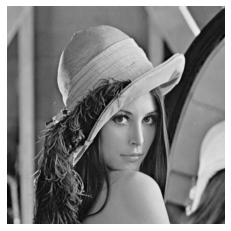

time = 1.6000795364379883


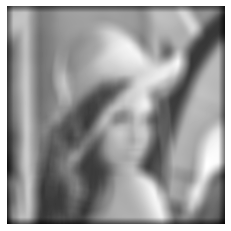

In [51]:
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

start = time.time()

img = cv2.imread('Lenna.png', 0)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

img = img / 255

# Dimensions of the image
x, y = img.shape

output = np.zeros_like(img)

# Dimensions of the Kernel
k1, k2 = 31, 31

# Row start = p1
# Row end = q1
p1 = 0
q1 = k1 // 2 + 1

for i in range(x):
    # Column start = p2
    # Column end = q
    p2 = 0
    q2 = k2 // 2 + 1
    
    if i != 0 and q1 < x:
        q1 += 1

    if x - i <= x - (k1 // 2 + 1):
        p1 += 1

    for j in range(y):
        if j != 0 and q2 < y:
            q2 += 1

        if y - j <= y - (k2 // 2 + 1):
            p2 += 1

        output[i, j] = np.sum(img[p1:q1, p2:q2])

output /= (k1 * k2)

end = time.time()
print('time =', end - start)

plt.imshow(output, cmap='gray')
plt.axis('off')
plt.show()


## Optimized Algorithm for Unsharp Masking Using OpenCV

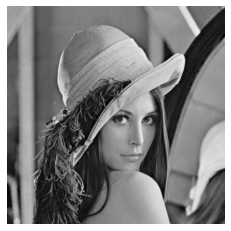

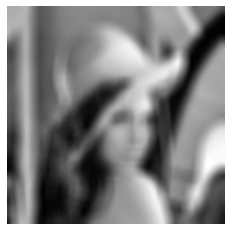

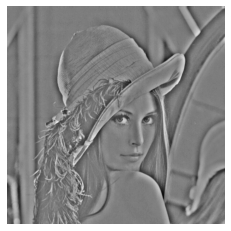

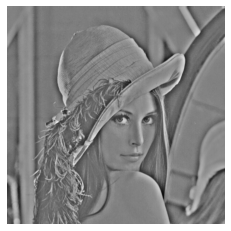

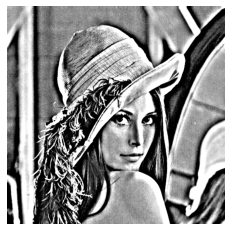


 
 time =  0.8252191543579102


In [52]:
start = time.time()

# input image f(x,y)
f = cv2.imread('Lenna.png', 0)

# normalize the image 
f = f / 255

# Displaying the original Image 
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

# blur image
f_blur = cv2.blur(f, ksize = (31,31))

plt.imshow(f_blur, cmap='gray'); plt.axis('off'); plt.show()

# mask
g_mask = f - f_blur
plt.imshow(g_mask, cmap='gray'); plt.axis('off'); plt.show()

# unsharp masking
k = 5
g = f + k*g_mask
plt.imshow(g, cmap='gray'); plt.axis('off'); plt.show()

g = np.clip(g, 0, 1)
plt.imshow(g, cmap='gray'); plt.axis('off'); plt.show()

end = time.time()
print('\n \n time = ', end-start)

In [ ]:
f_blur = cv2.GaussianBlur(src=f, 
                          ksize=(31,31), 
                          sigmaX=0, 
                          sigmaY=0)

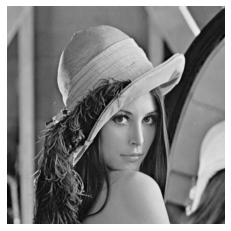

512
8
time =  132.88446307182312


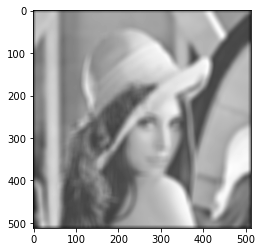

In [43]:
start = time.time()

img = cv2.imread('Lenna.png',0)
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.show()
output = np.zeros((512,512))

img = img/255

# Dimensions of the image 
x , y = img.shape
print(x)

# Dimensions of the Kernel
k1, k2 = 15,15


p1 = 0
q1 = k1//2 + 1
print(q1)

for i in range(0,x):
    p2 = 0
    q2 = k2//2 +1
    
    if( i!= 0 and q1 < x):
        q1 += 1
        
#if(x-i <= x-2):    
    if(x-i <= x-(k1//2 + 1) ):
        p1 += 1

    # solving for column values to check    
    for j in range(0,y):
        
        # if j is odd, increment its value
        if( j!= 0 and q2 < y):
            q2 += 1
           
                
#         if(y-j <= y-2):
        if(y-j <= (y-(k2//2 +1)) ):
            p2 += 1
            
        # calculating value of output
        for m in range(p1, q1):
            for n in range(p2, q2):
                output[i][j] += img[m][n]
#         print('(p1,q1) = ',p1,q1,  '(p2,q2) =',p2, q2)
        
    
# normalizing the values of output
for i in range(0,3) : 
    for j in range(0,3):
        output[i][j] = output[i][j]//(k1*k2)

# print(output)

end = time.time()
print('time = ', end-start)

plt.imshow(output,cmap ='gray')
plt.axis('off')
plt.show()


In [44]:
import numpy as np

image = np.array([[1,2,3],[4,5,6],[7,8,9]])

print('Original Image')
print(image)

# Initialize the output array for the blurred image
output = np.zeros_like(image)

# Define the kernel size
kernel_size = 3

# Calculate the padding size
padding = kernel_size // 2

# Apply the box blur
for i in range(padding, image.shape[0] - padding):
    for j in range(padding, image.shape[1] - padding):
        output[i, j] = np.mean(image[i - padding:i + padding + 1, j - padding:j + padding + 1])

print('\nBlurred Image')
print(output)

# Calculate the mask
mask = image - output

print('\nMask')
print(mask)

# Perform unsharp masking
final = image + mask

print('\nUnsharp Masking')
print(final)


Original Image
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Blurred Image
[[0 0 0]
 [0 5 0]
 [0 0 0]]

Mask
[[1 2 3]
 [4 0 6]
 [7 8 9]]

Unsharp Masking
[[ 2  4  6]
 [ 8  5 12]
 [14 16 18]]
